## 1. Decision tree classifier to find out the accuracy of the model using confusion matrix 

In [86]:
#### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#### Import DataSet
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\Breast-Cancer-Detection-using-Machine-Learning-master\cancer dataset.csv")

print ("Size of the whole dataset", df.shape)


Size of the whole dataset (569, 32)


In [88]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.head()  ### to analyse first 5 rows of our dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
X=df.iloc[:,2:31] #features that help us determine if patient has cancer or not
Y=df.iloc[:,1] #this is the dataset containing our target variable which indicates diagnosis

In [90]:
#### split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, random_state=0)
print("Shape of training data", X_train.shape)
print("Shape of test data" , X_test.shape)


Shape of training data (426, 29)
Shape of test data (143, 29)


In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Decision Tree Classifier Training Accuracy : 1.0


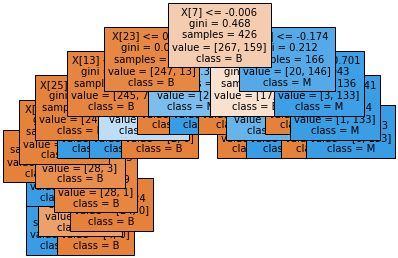

In [92]:
#### Train the decision tree algorithm on the data and make predictions
#### fit method of DecisionTreeClassifier class is called to train the algorithm on the training data

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

DTclassifier = DecisionTreeClassifier()   ## If max_depth is introduced the accuracy tend to change
DTclassifier.fit(X_train, Y_train)

print("Decision Tree Classifier Training Accuracy :", DTclassifier.score(X_train, Y_train))

cn = ['B','M']
a = plot_tree(DTclassifier,class_names=cn,fontsize=10,filled = True)


In [93]:
#### Now that our classifier has been trained, predictions are made on the test data 
#### To make predictions, the predict method of the DecisionTreeClassifier class is used

Y_pred = DTclassifier.predict(X_test)
print (Y_pred)


[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1]


In [94]:
#### Here we have trained our algorithm and made some predictions
#### Now we'll see how accurate our algorithm is, for this we are using confusion_matrix method

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[78 12]
 [ 2 51]]


In this model

true positive=78
True negative=51
False positive=12
False negative=2

In [95]:
#### To calculate the accuracy of model using confusion matrix

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print("Decision Tree Classifier Testing Accuracy =", (TP+TN)/(TP+TN+FN+FP))

Decision Tree Classifier Testing Accuracy = 0.9020979020979021


# 2.Random Forest classifier to find out the accuracy of the model using confusion matrix 

In [96]:
#### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#### Import DataSet
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\Breast-Cancer-Detection-using-Machine-Learning-master\cancer dataset.csv")

print ("Size of the whole dataset", df.shape)


Size of the whole dataset (569, 32)


In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
X=df.iloc[:,2:31] #features that help us determine if patient has cancer or not

Y=df.iloc[:,1] #this is the dataset containing our target variable which indicates diagnosis

In [100]:
#### split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, random_state=0)
print("Shape of training data", X_train.shape)
print("Shape of test data" , X_test.shape)


Shape of training data (426, 29)
Shape of test data (143, 29)


In [101]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [102]:
#### Training the Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

RFclassifier = RandomForestClassifier(random_state=0)  ## n_estimators can be introduce to vary the decision trees in random forest
RFclassifier.fit(X_train, Y_train)

print("Random Forest Classifier Training Accuracy:", RFclassifier.score(X_train, Y_train))


Random Forest Classifier Training Accuracy: 1.0


In [103]:
#### view all the individual trees from the fitted model

RFclassifier.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [104]:
#### Now that our classifier has been trained, predictions are made on the test data 
#### To make predictions, the predict method of the DecisionTreeClassifier class is used

Y_pred = RFclassifier.predict(X_test)
print (Y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


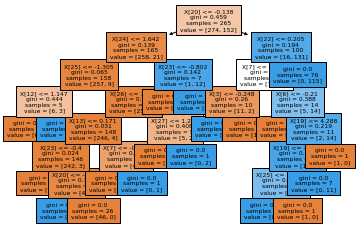

In [105]:
### to plot single decision tree out of all decision trees from random forest

from sklearn.tree import plot_tree

a= plot_tree(RFclassifier.estimators_[0], 
               filled = True, fontsize=6);

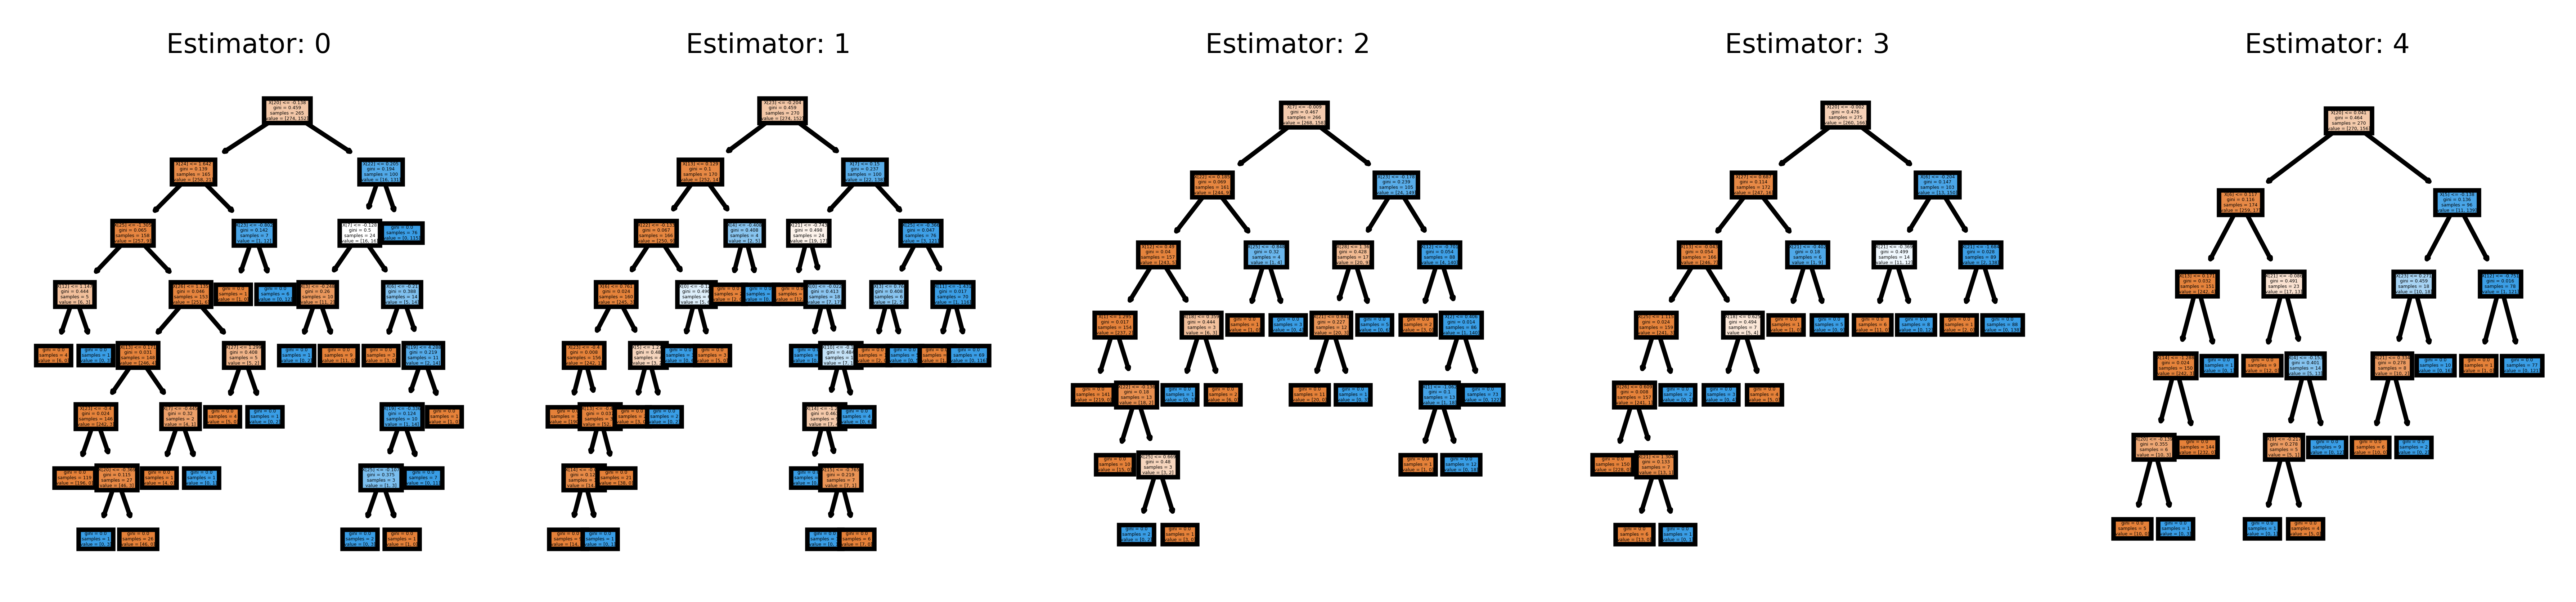

In [106]:
## To plot for 5 desion trees out of random forest
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(RFclassifier.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 6)


In [107]:
#### Here we have trained our algorithm and made some predictions
#### Now we'll see how accurate our algorithm is, for this we are using confusion_matrix method

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[87  3]
 [ 1 52]]


In this model

true positive=87
True negative=52
False positive=3
False negative=1

In [108]:
#### To calculate the accuracy of model using confusion matrix

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print("Random Forest Testing Accuracy : ", (TP+TN)/(TP+TN+FN+FP))

Random Forest Testing Accuracy :  0.972027972027972


So, The accuracy achieved by our random forest classifier is 97.20%

Out of above 2 models, the accuracy is higher for Random Forest classifier. 
As, it aggregates the votes from different decision trees to decide the final class of the test object having more accuracy